In [1]:
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path

print(Path().cwd())
os.chdir(Path().cwd().parent)
print(Path().cwd())

/Users/davidspector/Home/Stanford/QuantUS Projects/QuantUS-Plugins/CLI-Demos
/Users/davidspector/Home/Stanford/QuantUS Projects/QuantUS-Plugins


## Select Image & Phantom and Parse

In [2]:
from quantus.image_loading.utc_loaders.options import get_scan_loaders

print("Available scan types:", list(get_scan_loaders().keys()))

Available scan types: ['terason_rf', 'siemens_rf', 'philips_rf_sc_3d_PKL', 'canon_iq', 'clarius_rf', 'philips_rf_sc_3d', 'philips_pkl']


In [3]:
scan_type = 'philips_rf_sc_3d_PKL'

scan_path = '/Volumes/TOSHIBA EXT/Philips 3D RF/Scans/SHC-P004-V03-RF1_20241015_155205.pkl'
phantom_path = '/Volumes/TOSHIBA EXT/Philips 3D RF/Phantom/IMAN-PHANTOM-RF2_20250311_162604.pkl'
scan_loader_kwargs = {}

In [4]:
from quantus.entrypoints import scan_loading_step

image_data = scan_loading_step(scan_type, scan_path, phantom_path, **scan_loader_kwargs)

## Load Segmentation

In [5]:
from quantus.seg_loading.options import get_seg_loaders

print("Available segmentation loaders:", list(get_seg_loaders().keys()))

Available segmentation loaders: ['pkl_roi', 'nifti_voi']


In [6]:
seg_loader = 'nifti_voi'

seg_path = '/Volumes/TOSHIBA EXT/Philips 3D RF/Phantom/demo.nii.gz'
seg_loader_kwargs = {
    'assert_scan': False, # Checks if the seg is initially from the same scan
    'assert_phantom': False, # Checks if the seg is initially from the same phantom
}

In [7]:
from quantus.entrypoints import seg_loading_step

seg_data = seg_loading_step(seg_loader, image_data, seg_path, scan_path, phantom_path, **seg_loader_kwargs)

## Load Analysis Configuration

In [8]:
from quantus.analysis_config.utc_config.options import get_config_loaders

print("Available analysis config loaders:", list(get_config_loaders().keys()))

Available analysis config loaders: ['pkl_rf', 'philips_3d_config', 'clarius_L15_config', 'clarius_C3_config', 'custom']


In [9]:
config_loader = 'custom'

config_path = '/home/das/QuantUS_Projs/Test Data/Canon Data/Canon Fat study - sorted/Phantom data/analysis.pkl'
config_kwargs = {
  'transducer_freq_band': [0, 8000000], # Frequency band of the transducer in Hz
  'analysis_freq_band': [3000000, 5000000], # Frequency band for analysis in Hz
  'center_frequency': 4000000, # Center frequency of the transducer in Hz
  'sampling_frequency': 53330000, # Sampling frequency of the scan in Hz
  'ax_win_size': 5.0, # Axial window size in mm
  'lat_win_size': 5.0, # Lateral window size in mm
  'cor_win_size': 5.0, # Coronal window size in mm (only for 3D scans)
  'axial_overlap': 0.5, # Axial window overlap in percent
  'lateral_overlap': 0.5, # Lateral window overlap in percent
  'coronal_overlap': 0.5, # Coronal window overlap in percent (only for 3D scans)
  'window_thresh': 0.95 # Percentage of window area required to be considered in ROI
}

In [10]:
from quantus.entrypoints import analysis_config_step

config_data = analysis_config_step(config_loader, config_path, scan_path, phantom_path, **config_kwargs)

## Customize & Perform Analysis

In [11]:
from quantus.analysis.options import get_analysis_types, get_required_kwargs

all_analysis_types, all_analysis_funcs = get_analysis_types()
print("Available analysis types:", list(all_analysis_types.keys()))

Available analysis types: ['paramap']


In [12]:
analysis_type = 'paramap'

print("Available analysis functions:", list(all_analysis_funcs[analysis_type].keys()))

Available analysis functions: ['compute_power_spectra', 'lizzi_feleppa', 'attenuation_coef', 'bsc', 'nakagami_params', 'hscan', 'central_freq_shift', 'bsc_stft']


In [13]:
analysis_funcs = ['lizzi_feleppa'] # list of analysis functions to run (empty list means all)

# Find all required kwargs
analysis_funcs = analysis_funcs if len(analysis_funcs) else list(all_analysis_funcs[analysis_type].keys())
required_kwargs = get_required_kwargs(analysis_type, analysis_funcs)
print("Required kwargs for current analysis:", required_kwargs)

Required kwargs for current analysis: []


In [14]:
analysis_kwargs = {
}

In [15]:
from quantus.entrypoints import analysis_step

analysis_data = analysis_step(analysis_type, image_data, config_data, seg_data, analysis_funcs, **analysis_kwargs)

100%|██████████| 164/164 [00:00<00:00, 170.10it/s]


## Customize & Perform Visualizations

In [16]:
from quantus.visualizations.options import get_visualization_types

all_visualization_types, all_visualization_funcs = get_visualization_types()

print("Available visualization types:", list(all_visualization_types.keys()))

Available visualization types: ['paramap']


In [17]:
visualization_type = 'paramap'

print("Available visualization functions:", list(all_visualization_funcs[visualization_type].keys()))

Available visualization functions: ['plot_ps_window_data', 'plot_hscan_result', 'plot_hscan_wavelets', 'plot_bsc_stft', 'paramaps']


In [18]:
# List of visualization functions to run (empty list means no visualization)
visualization_funcs = ['paramaps', 'plot_ps_window_data'] 

visualization_kwargs = {
    'paramap_folder_path': 'visualization_results', # folder to save visualizations
    'hide_all_visualizations': False,
}

In [23]:
import matplotlib.pyplot as plt
from quantus.entrypoints import visualization_step

visualization_data = visualization_step(visualization_type, analysis_data, visualization_funcs, **visualization_kwargs)

plt.close('all')

DEBUG: ParamapVisualizations output directory: /Users/davidspector/Home/Stanford/QuantUS Projects/QuantUS-Plugins/visualization_results
DEBUG: Ensured output directory exists: /Users/davidspector/Home/Stanford/QuantUS Projects/QuantUS-Plugins/visualization_results
DEBUG: Saved paramap PKL and legend for 'mbf' to /Users/davidspector/Home/Stanford/QuantUS Projects/QuantUS-Plugins/visualization_results
DEBUG: Saved paramap PKL and legend for 'ss' to /Users/davidspector/Home/Stanford/QuantUS Projects/QuantUS-Plugins/visualization_results
DEBUG: Saved paramap PKL and legend for 'si' to /Users/davidspector/Home/Stanford/QuantUS Projects/QuantUS-Plugins/visualization_results
[DEBUG] visualization_funcs: ['paramaps', 'plot_ps_window_data']
[DEBUG] Executing visualization function: plot_ps_window_data
[DEBUG] Successfully executed visualization function: plot_ps_window_data


## View Data

In [31]:
import numpy as np

bmode_path = '/Users/davidspector/Home/Stanford/QuantUS Projects/QuantUS-Plugins/visualization_results/bmode.npy'
mbf_paramap_path = '/Users/davidspector/Home/Stanford/QuantUS Projects/QuantUS-Plugins/visualization_results/mbf_paramap.npy'
pixdims_path = '/Users/davidspector/Home/Stanford/QuantUS Projects/QuantUS-Plugins/visualization_results/pixdims.npy'

bmode = np.load(bmode_path)
mbf_paramap = np.load(mbf_paramap_path)
pixdims = np.load(pixdims_path)

In [32]:
bmode.shape, mbf_paramap.shape, pixdims

((277, 379, 278), (277, 379, 278), array([0.54657629, 0.29349819, 0.39813669]))

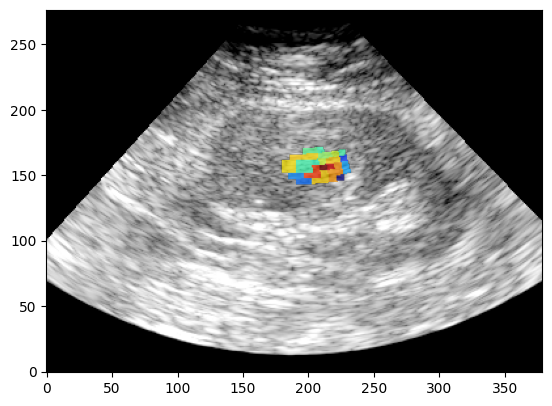

In [43]:
ax_frame = 150

plt.imshow(np.rot90(bmode[:, :, ax_frame], k=2), cmap='gray', origin='lower')
plt.imshow(np.rot90(mbf_paramap[:, :, ax_frame], k=2), cmap='jet', origin='lower', alpha=0.7)

In [33]:
affine = np.eye(4)
affine[0, 0] = pixdims[0]
affine[1, 1] = pixdims[1]
affine[2, 2] = pixdims[2]
affine[0, 3] = 0

In [34]:
!pip install 'napari[all]'


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [36]:
import napari
import numpy as np

viewer = napari.Viewer()
viewer.add_image(bmode, name='Image', colormap='gray', blending='additive', affine=affine)
viewer.add_image(mbf_paramap.T, name='Parametric Map', colormap='jet', blending='additive', opacity=0.7, affine=affine)

<Image layer 'Parametric Map' at 0x3c3a6b2d0>

## Customize & Perform Data Export

In [24]:
from quantus.data_export.options import get_data_export_types

all_data_export_types, all_data_export_funcs = get_data_export_types()
print("Available data export types:", list(all_data_export_types.keys()))

Available data export types: ['csv', 'pkl']


In [25]:
data_export_type = 'csv'

print("Available data export functions:", list(all_data_export_funcs[data_export_type].keys()))

Available data export functions: ['descr_vals', 'hscan_stats', 'radiomics_stats']


In [32]:
data_export_funcs = ['descr_vals', 'radiomics_stats']
data_export_path = 'test.csv'
data_export_kwargs = {
    'pyradiomics_yaml_paths': [
        '/home/das/QuantUS_Projs/QuantUS-Plugins/configs/pyradiomics/moderate.yml',
        '/home/das/QuantUS_Projs/QuantUS-Plugins/configs/pyradiomics/coarse.yml',
        '/home/das/QuantUS_Projs/QuantUS-Plugins/configs/pyradiomics/fine.yml',
        ]
}

In [33]:
from quantus.entrypoints import data_export_step

data_export_obj = data_export_step(data_export_type, visualization_data, data_export_path, data_export_funcs, **data_export_kwargs)